In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor


In [226]:
# Load the data 'C:\Users\CC-Student\Desktop\Warehouse\House_Price\train.csv'
df = pd.read_csv('C:/Users/CC-Student/Desktop/Data/House_Price/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [227]:
df.shape

(1460, 81)

In [228]:
file=r'C:\Users\CC-Student\Desktop\Data\House_Price\test.csv'
df_test = pd.read_csv(file)
#df_test.head(3)

In [229]:
df_test.shape

(1459, 80)

In [230]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [231]:
df.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)


Exploratory data analysis

In [232]:
df.SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [233]:
# Replace missing numerical values in the training data with the mean
df_num = df.select_dtypes(include=['float64', 'int64'])
df[df_num.columns] = df_num.apply(lambda x: x.fillna(x.mean()), axis=0)

# Replace missing numerical values in the test data with the mean
df_test_num = df_test.select_dtypes(include=['float64', 'int64'])
df_test[df_test_num.columns] = df_test_num.apply(lambda x: x.fillna(x.mean()), axis=0)

C:\Users\CC-Student\AppData\Local\Temp\ipykernel_15228\2090739219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


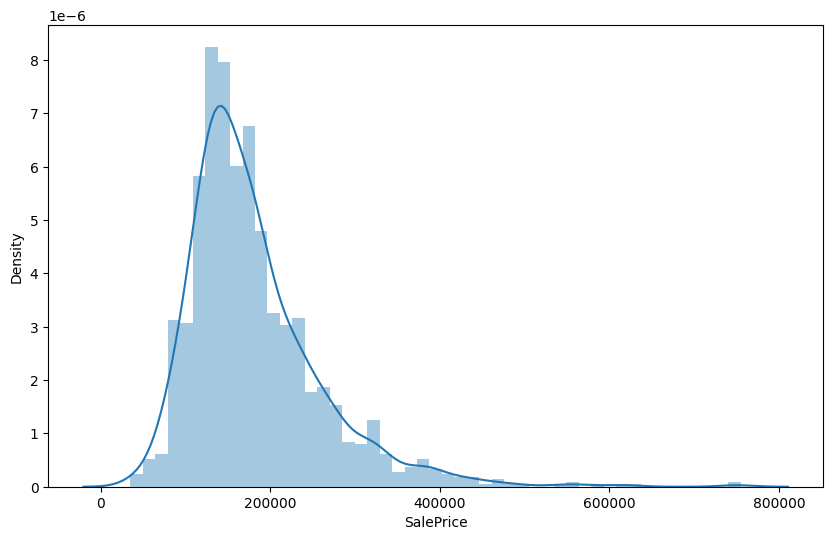

In [234]:
plt.figure(figsize=(10,6))
sns.distplot(df['SalePrice'])
plt.show()

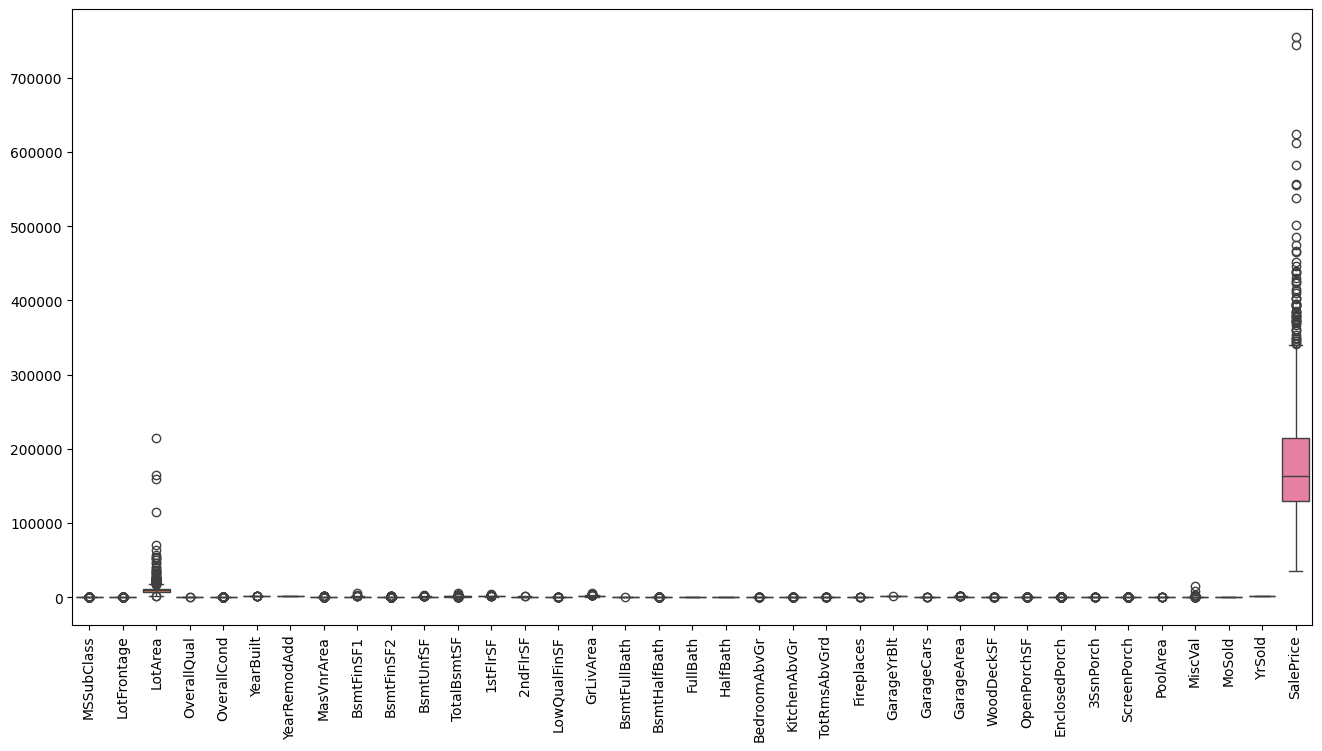

In [235]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


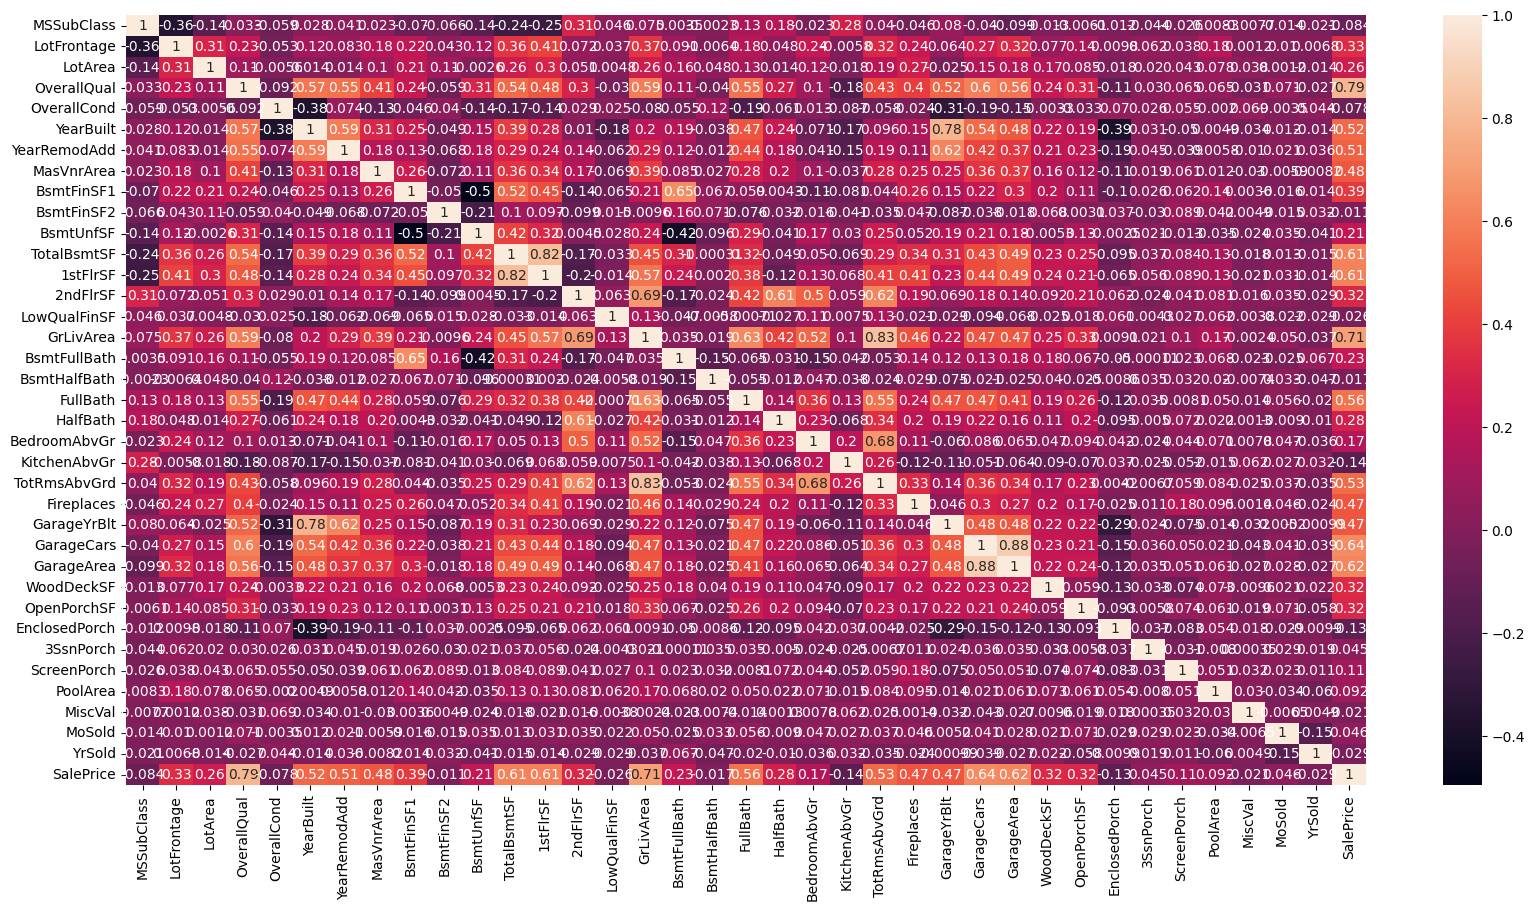

In [236]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.show()

In [237]:
# correlation of all features with SalePrice
correlation_with_saleprice = df_num.corr()['SalePrice'].sort_values(ascending=False) 


print(correlation_with_saleprice.head(15))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


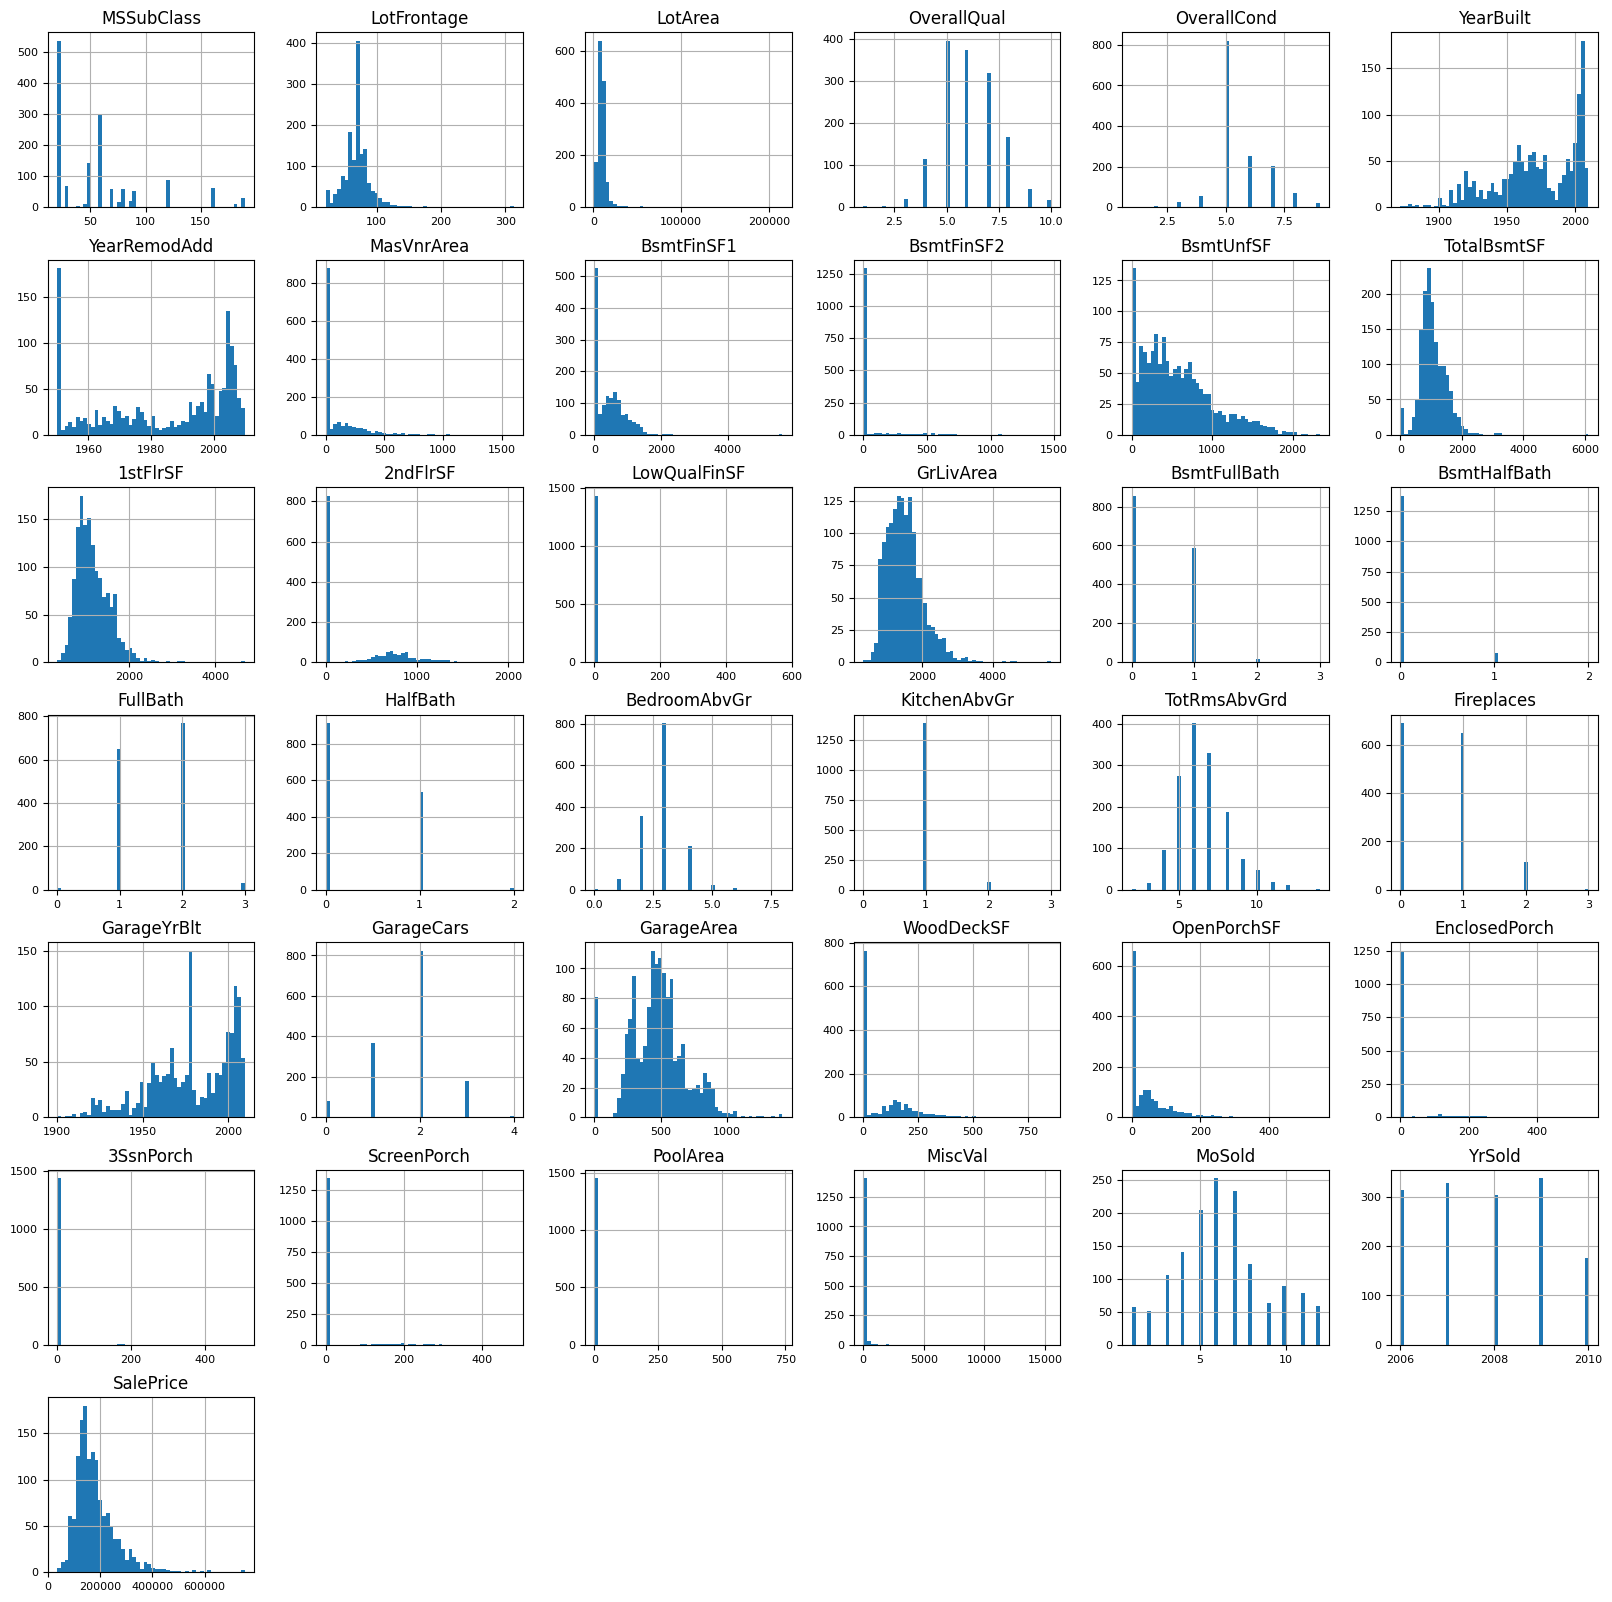

In [238]:
df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Data Preprocessing

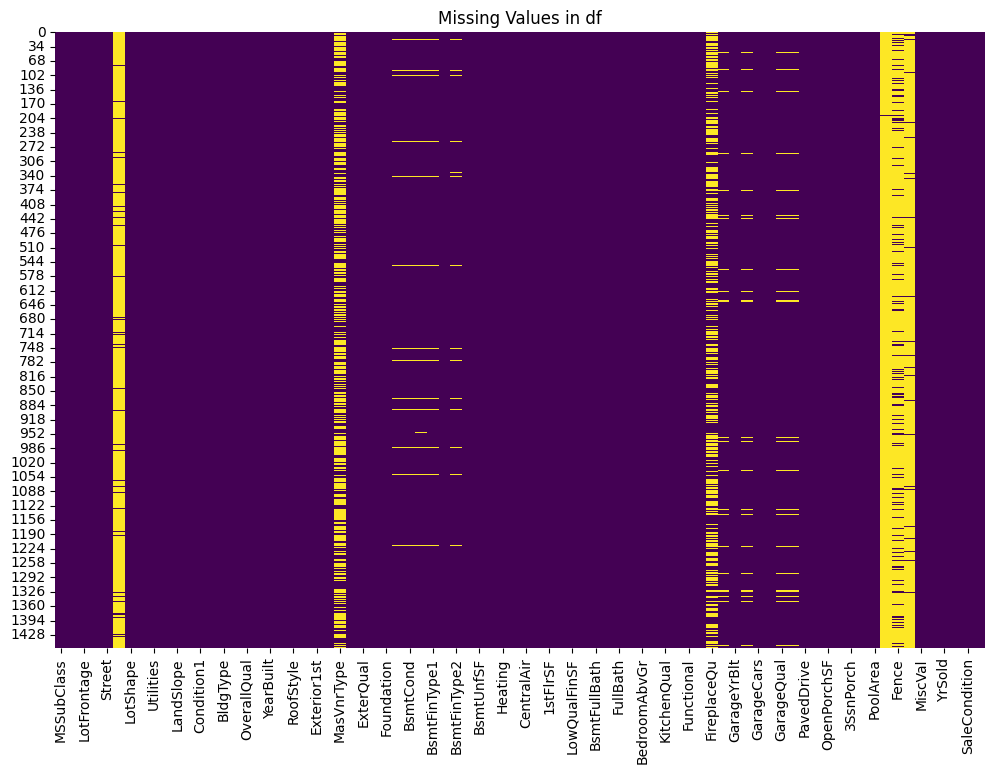

In [239]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in df')
plt.show()

In [240]:
df_missing = df.isnull().sum().sort_values(ascending=False)
df_missing = df_missing[df_missing > 0]
df_missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
Electrical         1
dtype: int64

In [241]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','MasVnrType'], axis=1, inplace=True)

In [242]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())



In [243]:
# Fill missing values in object columns with the most frequent value (mode)
df_object = df.select_dtypes(include=['object'])
df_object = df_object.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

df[df_object.columns] = df_object

df_test_object = df_test.select_dtypes(include=['object'])
df_test_object = df_test_object.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

df_test[df_test_object.columns] = df_test_object

In [244]:
#initializing the numerical columns and categorical columns
df_num = df.select_dtypes(include=['float64', 'int64'])
df_object = df.select_dtypes(include=['object'])


In [249]:
df_test_num = df_test.select_dtypes(include=['float64', 'int64'])
df_test_object = df_test.select_dtypes(include=['object'])

In [251]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Encode categorical columns
label_encoders = {}
for col in df_object.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Create feature matrix X and target vector y
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [246]:
#shape of the training and testing data
print(X_train.shape)
print(X_test.shape)

(1168, 73)
(292, 73)


In [247]:
#RMSE and R2 score for the training data and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Training RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Training R2:', r2_score(y_train, y_train_pred))
print('Testing R2:', r2_score(y_test, y_test_pred))


Training RMSE: 11160.822755146935
Testing RMSE: 28449.238546314253
Training R2: 0.9791159506348912
Testing R2: 0.8944817792616538


In [248]:
#output of the model
output = model.predict(df_test)
output

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Alley
- Fence
- FireplaceQu
- MasVnrType
- MiscFeature
- ...


In [215]:
#encoding the categorical columns
#df_object = pd.get_dummies(df_object, drop_first=True)



In [216]:
#concatenating the numerical and encoded categorical columns
df = pd.concat([df_num, df_object], axis=1)


In [217]:
# initializing the features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
# initializing the model random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'RL'

In [169]:
#RMSE and R2 score
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)

RMSE: 28449.238546314253


In [156]:
from sklearn.preprocessing import LabelEncoder

# Liste der Spalten
columns_to_convert = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                      'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                      'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                      'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                      'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                      'SaleType', 'SaleCondition']

label_encoders = {}

for col in columns_to_convert:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


In [157]:
df_missing.fillna(df_missing.mean(), inplace=True)

In [158]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title('Missing Values in df')
#plt.show()

Target & Feauters

In [159]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [160]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
model = RandomForestRegressor( random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:{:,.0f}'.format(mae))
print('R2 Score:', r2_score(y_test, predictions))

Mean Absolute Error:16,565
R2 Score: 0.894521671948773


In [162]:
predictions

array([212354.5 , 158381.21, 116559.  ,  82773.11, 149143.36, 339805.54,
       298590.98, 148092.53, 218760.58, 236526.36, 174058.93,  78513.61,
       195072.53, 363539.62, 238963.94, 114656.5 , 116199.87, 131654.37,
       210962.33, 126094.02, 122612.48, 130173.87, 272150.53, 325679.8 ,
        94638.54, 182511.82, 140327.21, 186378.83, 457721.45, 134289.  ,
       127687.46, 113446.58, 123325.58,  94072.75, 148760.88, 343629.97,
       120886.  ,  91738.13, 259665.46, 109099.  , 151901.84, 148374.  ,
       104895.58, 124017.5 , 179892.25, 178775.93, 130172.65, 183334.06,
       253884.24, 255644.4 , 107952.  , 282200.88, 119583.04, 235079.23,
       204466.81, 109556.29, 124823.58, 168215.41, 125122.1 , 177911.5 ,
       160737.  , 289770.9 , 104589.59, 129107.51, 171095.24, 129047.5 ,
       140693.59, 219401.25, 150194.  , 153251.95, 181378.99, 119727.77,
       321542.84, 168268.62, 161718.32, 211200.24, 167455.04, 128313.34,
       401879.07, 200744.48, 192234.  , 139229.36, 

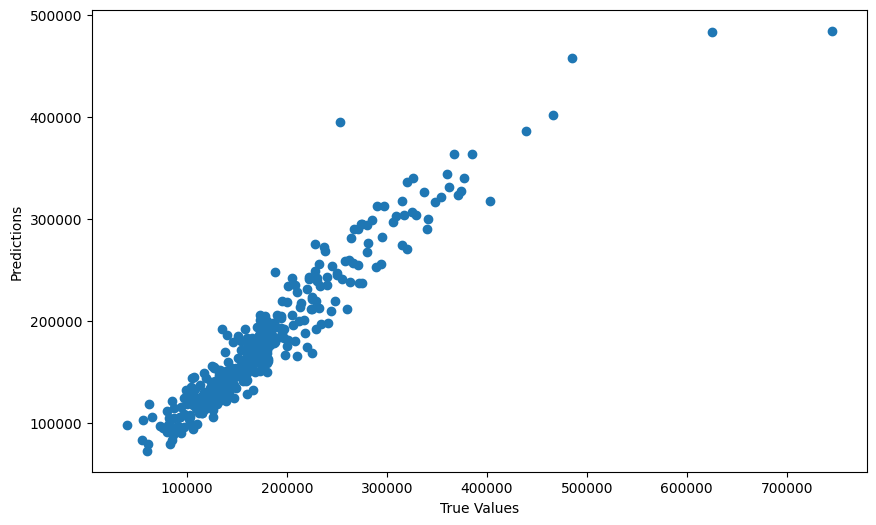

In [ ]:
#visuale prediction
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

NameError: name 'training_loss' is not defined

<Figure size 1000x600 with 0 Axes>